# Projectile motion

An object is thrown with initial velocity  $v_0$ = 6 m/s. The velocity vector $\vec{v}_0$ forms an angle $\theta_0$ = $\pi$/6 with the horizontal. 

Goal: estimate the horizontal range, the total time of flight and the maximum height reached during the flight.

![](img/ProjectileStrobo.png)


## Discussion of the problem
If we assume that air resistance can be neglected and we consider that the motion occurs with constant acceleration, equal to the acceleration of gravity $\vec{g}$, we obtain the equations that describe the position of the object, considered as a **point-like object**, as a function of time. From these equations we can derive the equations for:
* the **horizontal range**

$$ R = \dfrac{v_0^2}{g}\sin 2\theta_0 $$

* the **time of flight**

$$ t_{volo} = \dfrac{2 v_0\sin\theta_0}{g} $$

* the **maximum height**

$$ h = \dfrac{(v_0\sin\theta_0)^2}{g} $$



## Performing calculations with Python

To perform the calculations we use the **numpy** module and we also use the **matplotlib** module to graphically represent the quantities that characterize the motion in this example.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

v0 =  6             # initial velocity (m/s)
theta0 = np.pi/4    # angle between the velocity vector and the horizontal direction (radians)
g = 9.8             # gravity acceleration (m/s^2)

R = (v0**2) * np.sin(2*theta0) / g   #   horizontal range

tB = 2 * v0 * np.sin(theta0) / g     #   time of flight

h = ((v0*np.sin(theta0))**2)/g       #   maximum height


print('\nHorizontal range = {0:0.3f} (m)\n'.format(R))
print('Time of flight = {0:0.3f} (s)\n'.format(tB))
print('Maximum height = {0:0.3f} (m)\n'.format(h))



Horizontal range = 3.673 (m)

Time of flight = 0.866 (s)

Maximum height = 1.837 (m)



[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/POSS-UniMe/simple-physics-with-Python-ITA/master?filepath=notebook%2F2-1-1-MotoProiettile.ipynb)

## Study of the motion: kinematic equations and trajectory

The kinematic equations give the value of each of the coordinates of the point-like body as a function of time. In this case:

$$ x(t) = v_{0x} t $$

$$ y(t) = v_{0y} t - \dfrac{1}{2}gt^2 $$

where $v_{0x}$ and $v_{0y}$ are the components of the velocity vector $\vec{v}_0$ at time $t = 0$ with respect to the Cartesian axes $x$ and $y$.

$$ v_{0x} = v_0 \cos\theta_0 $$

$$ v_{0y} = v_0 \sin\theta_0 $$

* We can use the equations $x(t)$ and $y(t)$ as parametric equations for the  **trajectory**.
* In fact we can consider an **array** array of values of $t$ in the range between the initial instant $t=0$ and a final instant which, for convenience, we choose to coincide with $t_B$, the *time of flight*.
* To generate the array of values distributed linearly between $0$ and $t_B$ we use the **linspace()** function of the **numpy** module.
* We calculate the $x$ and $y$ coordinates corresponding to each of the values of $t$ belonging to the array.
* We graph the points corresponding to the pairs of coordinates $x, y$ for each value of $t$ so to obtain the graph of the trajectory.
* It is important that the $x$ axis and the $y$ axis have the same unit of measurement and the same scale.

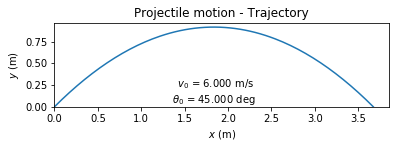

In [3]:
t = np.linspace(0, tB, 128)     
x = v0 * np.cos(theta0)*t
y = v0 * np.sin(theta0)*t - 0.5 * g * t**2

print()
plt.figure(2)
plt.plot(x,y)
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.xlim(left=0)
plt.ylim(bottom = 0)

plt.gca().set_aspect('equal', adjustable = 'box')    # this is important

string =r" $v_0$ = {0:0.3f} m/s".format(v0)+ '\n' + r"$\theta_0$ = {0:0.3f} deg".format(theta0*180/np.pi)
plt.text(R/2,0,string, horizontalalignment='center', verticalalignment='bottom')
plt.title('Projectile motion - Trajectory')
plt.show()
print()

## Dependence on the launch angle $\theta_0$

Let us consider the trajectory obtained in correspondence to different values of the launch angle $\theta_0$, while keeping constant the magnitude of the initial velocity $v_0$.

* We produce an array of values of $\theta_0$ using the  **arange()** function of the **numpy** module
* We graph the trajectories corresponding to all the values of  $\theta_0$

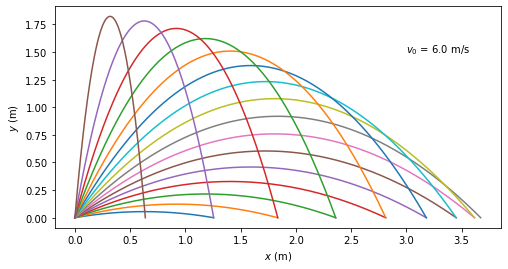

In [4]:
theta0deg = np.arange(10, 90, 5)
theta0=theta0deg*np.pi/180

fig = plt.figure(3,(8,6))

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.text(3.0, 1.50, r'$v_0$ = {0:0.1f} m/s'.format(v0))

for angle in theta0:
    tB = 2 * v0 * np.sin(angle)/ g
    t = np.linspace(0, tB, 128)
    x = v0 * np.cos(angle)*t
    y = v0 * np.sin(angle)*t - 0.5 * g * t**2
    plt.plot(x,y)
    plt.draw()

plt.gca().set_aspect('equal', adjustable = 'box')
#plt.savefig('AllTrajectories.pdf')
plt.show()

### Get a feel of

What changes when the launch angle $\theta_0$ changes?
* Time of flight
* Horizontal range
* Maximum height

> Complementary angles (for instance, 30° and 60°) give the same horizontal range 
>> but the time of flight and the maximum height are different.


### Simulation and prediction

By choosing to vary the angle $\theta_0$ in steps of $1$ degree, an *envelope curve* that delimits the region whose points 
<span style="color:red">are not reached by any trajectory</span>, whatever the launch angle $\theta_0$, for a given initial velocity $v_0$.

This curve is called a **safety parabola**, described by the equation

$$ y = \dfrac{v_0^2}{2g} - \dfrac{1}{2}\dfrac{g}{v_0^2}x^2 $$


In the following script we produce a plot containing:
* the different trajectories corresponding to values of $\theta_0$ increased in steps of $1$ degree
* the safety parabola


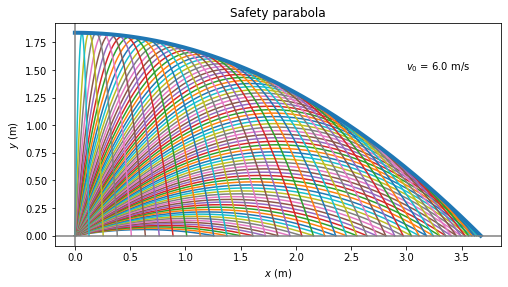

In [5]:
print()

theta0deg = np.arange(10, 90, 1)
theta0=theta0deg*np.pi/180

fig = plt.figure(4,(8,6))

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.text(3.0, 1.50, r'$v_0$ = {0:0.1f} m/s'.format(v0))

for angle in theta0:
    tB = 2 * v0 * np.sin(angle)/ g
    t = np.linspace(0, tB, 128)
    x = v0 * np.cos(angle)*t
    y = v0 * np.sin(angle)*t - 0.5 * g * t**2
    plt.plot(x,y)
    plt.draw()

plt.gca().set_aspect('equal', adjustable = 'box')
#plt.savefig('AllTrajectories.pdf')

Rmax = R = (v0**2) / g   #   gittata massima
xx = np.linspace(0, Rmax, 180) 
yy = v0*v0/(2*g)- 0.5*g*xx*xx/(v0*v0)
plt.plot(xx,yy, linewidth = 4)
plt.axhline(color='gray')
plt.axvline(color='gray')
plt.title('Safety parabola')

plt.show()

> To work interactively and execute Python code in an online  **binder** environment,

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/POSS-UniMe/simple-physics-with-Python/master?filepath=notebook%2F/Chapter02/2-1-1c-ProjectileMotionSimulation.ipynb)


## What we have learned
*Physics*
* Parameters that characterize the motion of a projectile
* Determination of the trajectory
* Dependence on the launch angle

*Python*
* Generate an array of values homogenously distributed over a certain range
* Build a plot with the same scales for the two axes
* Iterating with the **for** loop

## References and notes

#### Images
1. Figure 1. Image of the flight of a ping pong ball obtained from a video recorded with a Samsung 9 smartphone in slow motion mode and analyzed with the [**Tracker**](https://physlets.org/tracker) software.

#### Python
2. Matplotlib 3.3.1 documentation on [pyplot.figure](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.figure.html) with 88 examples!
3. [matplotlib.text](https://matplotlib.org/3.3.1/api/text_api.html) class for including text in a figure
4. [matplotlib.pyplot.xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html) Get or set the x limits of the current axes.
5. [Pyplot documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)
6. [matplotlib tutorials](https://matplotlib.org/tutorials/intermediate/imshow_extent.html#sphx-glr-tutorials-intermediate-imshow-extent-py)

&nbsp;


## Recommended

Have fun with Physics simulations at [PhET](https://phet.colorado.edu/en/simulations/projectile-motion)

&nbsp;


### Copyright and License
--------------------------
(c) 2021 Andrea Mandanici, Giuseppe Mandaglio, Giovanni Pirrotta, Valeria Conti Nibali. All content is under Creative Common Attribution  <a rel="license" href="https://creativecommons.org/licenses/by/4.0" > CC BY 4.0 <a/> 
 and all code is under [BSD 3-Clause License](https://opensource.org/licenses/BSD-3-Clause). Notebook based on the Italian version (c) 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta: content under Creative Common Attribution CC BY 4.0, code under BSD 3-Clause License. 